In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd

loc = r'D:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\NO2_H2O2 cuvette\data.hdf5'

In [3]:
with h5py.File(loc, 'r') as file:
    for measurement in file.keys():
        measurements = []
        print(measurement)
        for key in file[measurement].keys():
            measurements.append(file[measurement][key][()])
        

1
2
3
4
5
6
7
8


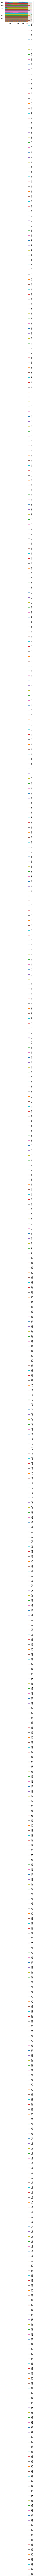